# Первое знакомство с нейронной сетью

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
help(mnist)


Help on module keras.datasets.mnist in keras.datasets:

NAME
    keras.datasets.mnist - MNIST handwritten digits dataset.

FUNCTIONS
    load_data(path='mnist.npz')
        Loads the MNIST dataset.
        
        # Arguments
            path: path where to cache the dataset locally
                (relative to ~/.keras/datasets).
        
        # Returns
            Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.

DATA
    absolute_import = _Feature((2, 5, 0, 'alpha', 1), (3, 0, 0, 'alpha', 0...
    division = _Feature((2, 2, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0), 8192...
    print_function = _Feature((2, 6, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0)...

FILE
    /home/kmx/anaconda3/lib/python3.7/site-packages/keras/datasets/mnist.py




In [18]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data(path='/home/kmx/dev/python/ml_python_book/datasets/mnist.npz')

In [7]:
print(train_images.shape, len(train_labels), sep='\n')

(60000, 28, 28)
60000


In [8]:
print(test_images.shape, len(test_labels), sep='\n')

(10000, 28, 28)
10000


In [9]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [10]:
network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [12]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.2551 - accuracy: 0.9272
Epoch 2/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.1035 - accuracy: 0.9692
Epoch 3/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.0677 - accuracy: 0.9797
Epoch 4/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.0495 - accuracy: 0.9852
Epoch 5/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0368 - accuracy: 0.9890


In [14]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 53us/step
test_acc: 0.9781000018119812


In [15]:
help(network)

Help on Sequential in module keras.engine.sequential object:

class Sequential(keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  # Arguments
 |      layers: list of layers to add to the model.
 |      name: Name given to the model
 |  
 |  # Example
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model

# Представление данных для нейронных сетей


900


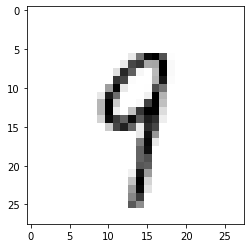

In [21]:
digit = train_images[int(input())]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()